# Minimos Cuadrados


## Por: Alejandro Mesa Gómez, C.C. : 1017228006

## A-Mínimos cuadrados
### 1- Grafique los datos (x,y) de la tabla.

|X  | Y |
|------|------|
|0.0  | 1.95 |
|0.5  | 2.21 |
|1.0 |  3.07 |
|1.5  | 3.90 |
|2.0  | 4.43 |
|2.5  | 5.20 |
|3.0  | 4.02 |
|3.5  | 5.38 |
|4.0  | 6.59 |
|4.5  | 5.86 |
|5.0  | 6.57|
|5.5  | 6.36 |
|6.0  | 6.67 |





grafica preliminar de los puntos: 


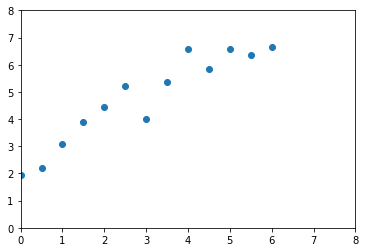

In [1]:
########################################################
## Librerias para el trabajo
########################################################
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


data1= np.loadtxt('datos.csv',delimiter=',') #datos para regresion lineal
X1=data1[:,0]
Y1=data1[:,1]
print 
print 'grafica preliminar de los puntos: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X1,Y1,'o')
ax.set_xlim(xmin=0.0, xmax=8)
ax.set_ylim(ymin=0.0, ymax=8)
plt.show()

### 2- Aplique paso a paso el método de mínimos cuadrados de tal forma que le permita obtener la mejor curva lineal de ajuste de los datos anteriores, y determine las incertezas asociadas a los parámetros. Determine los coeficientes de correlación $ \chi ^{2} $ y  $ R ^{2} $.  Reporte correctamente los parámetros con su incertidumbre y concluya sobre la conveniencia de la regresión lineal a partir de las correlaciones obtenidas.

a)  $$a_{0}= \frac{(\sum x_{i}^{2})\sum y_{i} - (\sum x_{i})(\sum x_{i}y_{i})}{n\sum x_{i}^{2} - (\sum x_{i})^{2}}$$

In [2]:
#n:
n=len(X1)

#suma xi cuadrado:
suma_xi2=0
for i in xrange(0,n):
    suma_xi2+=(X1[i]*X1[i])
    
#suma yi cuadrado:
suma_yi2=0
for i in xrange(0,n):
    suma_yi2+=(Y1[i]*Y1[i])
    
#suma xi simple:
suma_xi=0
for i in xrange(0,n):
    suma_xi+=(X1[i])
    
#suma yi simple:
suma_yi=0
for i in xrange(0,n):
    suma_yi+=(Y1[i])
    
#suma xi*yi:
suma_xiyi=0
for i in xrange(0,n):
    suma_xiyi+=(X1[i]*Y1[i])
    

a0=((suma_xi2*suma_yi)-(suma_xi*suma_xiyi))/(n*suma_xi2-(suma_xi*suma_xi))
print 'a0 =  %.1f'%a0

a0 =  2.4


b)   $$a_{1}= \frac{n\sum x_{i}y_{i} - (\sum x_{i})(\sum y_{i})}{n\sum x_{i}^{2} - (\sum x_{i})^{2}}$$

In [3]:
a1=((n*suma_xiyi)-(suma_xi*suma_yi))/(n*suma_xi2-(suma_xi*suma_xi))
print 'a1 =  %.1f'%a1

a1 =  0.8


c) $$y= a_{0}+a_{1}x$$


grafica de los puntos con ajuste: 


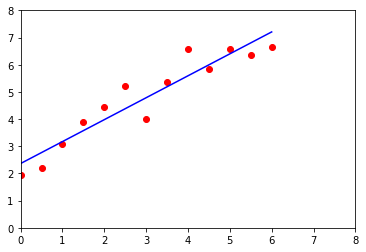

In [4]:
x=np.linspace(X1[0],X1[-1],n)
y=(a0 +a1*x)

print 
print 'grafica de los puntos con ajuste: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X1,Y1,'ro')
ax.plot(x,y,'b-')
ax.set_xlim(xmin=0.0, xmax=8)
ax.set_ylim(ymin=0.0, ymax=8)
plt.show()

$$S_{y} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n}(y_{i}-a_{0}-a_{1}x_{i})^{2}}$$ 

$$S_{my} = \frac{S_{y}}{n^{1/2}}$$

$$S_{ma0}^{2}= \frac{S_{my}^{2}\sum x_{i}^{2}}{n\sum x_{i}^{2} - (\sum x_{i})^{2}}$$

$$ S_{ma1}^{2}= \frac{n S_{my}^{2}}{n\sum x_{i}^{2} - (\sum x_{i})^{2}}$$

In [5]:
#desviacion estandar

Sy=0
for i in xrange(0,len(y)):
    Sy+= (y[i]-a0-a1*x[i])**2
    #print Sy
Sy*=(1/(len(y)-2.))
#print Sy
Sy=Sy**(1/2)
print 'Sy %.1f'%Sy

#error en y
raiz= np.sqrt(n)
Smy=Sy/(raiz)
print 'Smy %.1f'%Smy

#error en a0
S2_ma0=(Smy*Smy*suma_xi2)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma0

#error en a0
S2_ma1=(Smy*Smy*n)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma1
                          

Sy 1.0
Smy 0.3
S2_ma0 0.021133
S2_ma0 0.001691


$$a_{0}\pm S_{ma0} $$     $$ a_{1}\pm S_{ma1} $$

In [6]:
print 'a0 ± sma0: %f ± %f'%(a0,np.sqrt(S2_ma0))
print 'a1 ± sma1: %f ± %f'%(a1,np.sqrt(S2_ma1))
print ('y= (%.2f±%.2f)x+(%.2f±%.2f)'%(a0,np.sqrt(S2_ma0),a1,np.sqrt(S2_ma1)))

a0 ± sma0: 2.363956 ± 0.145371
a1 ± sma1: 0.807143 ± 0.041117
y= (2.36±0.15)x+(0.81±0.04)


### 3- Grafique todas las posibles curvas de la regresión lineal teniendo en cuenta el error determinado para los parámetros. Concluya al respecto.


grafica de los puntos con ajustes y errores: 
es facil observar que todas las curvas posibles variando los errores, están muy cerca de la curva "perfecta", lo    cual implica que el ajuste es bastante bueno y los datos tienen muy bajo error


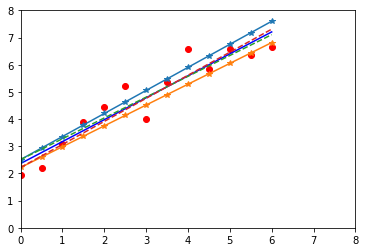

In [7]:
err_a0= np.sqrt(S2_ma0)
err_a1= np.sqrt(S2_ma1)

y=(a0 +a1*x)
y1=((a0+err_a0) +(a1+err_a1)*x)
y2=((a0-err_a0) +(a1-err_a1)*x)
y3=((a0+err_a0) +(a1-err_a1)*x)
y4=((a0-err_a0) +(a1+err_a1)*x)
print 
print 'grafica de los puntos con ajustes y errores: '
print 'es facil observar que todas las curvas posibles variando los errores, están muy cerca de la curva "perfecta", lo    cual implica que el ajuste es bastante bueno y los datos tienen muy bajo error'
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X1,Y1,'ro')
ax.plot(x,y,'b-')
ax.plot(x,y1,'-*')
ax.plot(x,y2,'-*')
ax.plot(x,y3,'--')
ax.plot(x,y4,'--')
ax.set_xlim(xmin=0.0, xmax=8)
ax.set_ylim(ymin=0.0, ymax=8)
plt.show()

$ \chi ^{2} $ : $$ \chi ^{2} = \sum_{i}^{n} \frac{(Y_{observada}-Y_{teorica})^{2}}{Y_{teorica}}$$y  $ R ^{2} $: $$r^{2} =a_{1} * a_{1}^{'} $$
donde: 
$$a_{1}= \frac{n\sum x_{i}y_{i} - (\sum x_{i})(\sum y_{i})}{n\sum x_{i}^{2} - (\sum x_{i})^{2}}$$ y 
$$a_{1}^{'}= \frac{n\sum x_{i}y_{i} - (\sum x_{i})(\sum y_{i})}{n\sum y_{i}^{2} - (\sum y_{i})^{2}}$$
fuente: http://mathworld.wolfram.com/CorrelationCoefficient.html

In [8]:
#chi2

chi2=0

for i in xrange(0,n):
    chi2=((y[i]-Y1[i])**2)/Y1[i]
    
print 'chi^2 = ',chi2

# r2

b=a1
bprima=a1=((n*suma_xiyi)-(suma_xi*suma_yi))/(n*suma_yi2-(suma_yi*suma_yi))

r2=b*bprima
print 'r^2 = ',r2

chi^2 =  0.0432036578016
r^2 =  0.891135955744




## B- Ajuste de Curva.

### Tabla de datos:

|    X |  Y   |
|------|------|
|1.0| 2.1|
|2.0| 4.3|
|3.0| 6.0|
|4.0| 7.8|

### 1 - Encontrar la función que mejor se ajuste a los datos. 
### Pruebe con las siguientes regresiones: LINEAL “y=ax + “b, y CUADRADA “$y=ax^{2}$”. Redefina la función cuadrada de forma que quede lineal y pueda usar todo lo que ya aplicó sobre regresión lineal.

#### Lineal



grafica preliminar de los puntos: 


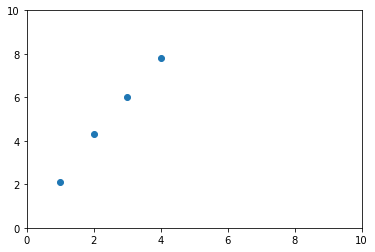

In [9]:
X2=[1.0,2.0,3.0,4.0]
Y2=[2.1,4.3,6.0,7.8]

print 
print 'grafica preliminar de los puntos: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X2,Y2,'o')
ax.set_xlim(xmin=0.0, xmax=10)
ax.set_ylim(ymin=0.0, ymax=10)
plt.show()

In [10]:
#n:
n2=len(X2)

#suma xi cuadrado:
suma_xi2=0
for i in xrange(0,n2):
    suma_xi2+=(Y2[i]*X2[i])
    
#suma yi cuadrado:
suma_yi2=0
for i in xrange(0,n2):
    suma_yi2+=(Y2[i]*Y2[i])
    
#suma xi simple:
suma_xi=0
for i in xrange(0,n2):
    suma_xi+=(X2[i])
    
#suma yi simple:
suma_yi=0
for i in xrange(0,n2):
    suma_yi+=(Y2[i])
    
#suma xi*yi:
suma_xiyi=0
for i in xrange(0,n2):
    suma_xiyi+=(X2[i]*Y2[i])
    

a0=((suma_xi2*suma_yi)-(suma_xi*suma_xiyi))/(n2*suma_xi2-(suma_xi*suma_xi))
print 'a0 =  %.1f'%a0

a1=((n2*suma_xiyi)-(suma_xi*suma_yi))/(n2*suma_xi2-(suma_xi*suma_xi))
print 'a1 =  %.1f'%a1

a0 =  4.4
a1 =  0.3



grafica de los puntos con ajuste: 


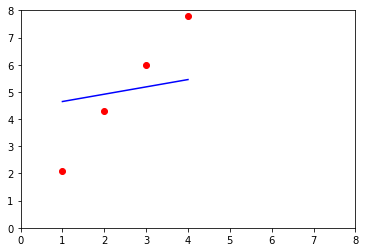

In [11]:
x=np.linspace(X2[0],X2[-1],n2)
y=(a0 +a1*x)

print 
print 'grafica de los puntos con ajuste: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(X2,Y2,'ro')
ax.plot(x,y,'b-')
ax.set_xlim(xmin=0.0, xmax=8)
ax.set_ylim(ymin=0.0, ymax=8)
plt.show()

In [12]:
#desviacion estandar

Sy=0
for i in xrange(0,n2):
    Sy+= (y[i]-a0-a1*x[i])**2
    #print Sy
Sy*=(1/(len(y)-2.))
#print Sy
Sy=Sy**(1/2)
print 'Sy %.1f'%Sy

#error en y
raiz= np.sqrt(n)
Smy=Sy/(raiz)
print 'Smy %.1f'%Smy

#error en a0
S2_ma0=(Smy*Smy*suma_xi2)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma0

#error en a0
S2_ma1=(Smy*Smy*n)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma1
                          

Sy 1.0
Smy 0.3
S2_ma0 0.006789
S2_ma0 0.001473


In [13]:
print 'a0 ± sma0: %f ± %f'%(a0,np.sqrt(S2_ma0))
print 'a1 ± sma1: %f ± %f'%(a1,np.sqrt(S2_ma1))
print ('y= (%.2f±%.2f)x+(%.2f±%.2f)'%(a0,np.sqrt(S2_ma0),a1,np.sqrt(S2_ma1)))

a0 ± sma0: 4.376648 ± 0.082395
a1 ± sma1: 0.269341 ± 0.038385
y= (4.38±0.08)x+(0.27±0.04)


In [14]:
#chi2

chi2=0

for i in xrange(0,n2):
    chi2=((y[i]-Y2[i])**2)/Y2[i]
    
print 'chi^2 = ',chi2

# r2

b=a1
bprima=a1=((n2*suma_xiyi)-(suma_xi*suma_yi))/(n2*suma_yi2-(suma_yi*suma_yi))

r2=b*bprima
print 'r^2 = ',r2

chi^2 =  0.705597720978
r^2 =  0.142797809227


#### cuadratica


linealización, realizada a partir de la ecuacion dada para linealización potencial en: https://aarrietaj.files.wordpress.com/2012/02/linealizacion.pdf


grafica preliminar de los puntos: 


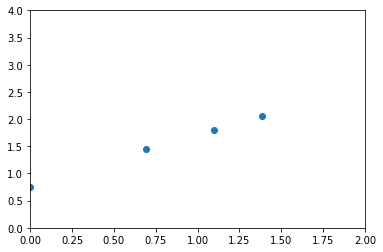

In [15]:
logX2=np.log(X2)
logY2=np.log(Y2)

print 
print 'grafica preliminar de los puntos: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(logX2,logY2,'o')
ax.set_xlim(xmin=0.0, xmax=2)
ax.set_ylim(ymin=0.0, ymax=4)
plt.show()

In [16]:
#n:
n2=len(logX2)

#suma xi cuadrado:
suma_xi2=0
for i in xrange(0,n2):
    suma_xi2+=(logY2[i]*logX2[i])
    
#suma yi cuadrado:
suma_yi2=0
for i in xrange(0,n2):
    suma_yi2+=(logY2[i]*logY2[i])
    
#suma xi simple:
suma_xi=0
for i in xrange(0,n2):
    suma_xi+=(logX2[i])
    
#suma yi simple:
suma_yi=0
for i in xrange(0,n2):
    suma_yi+=(logY2[i])
    
#suma xi*yi:
suma_xiyi=0
for i in xrange(0,n2):
    suma_xiyi+=(logX2[i]*logY2[i])
    

a0=((suma_xi2*suma_yi)-(suma_xi*suma_xiyi))/(n2*suma_xi2-(suma_xi*suma_xi))
print 'a0 =  %.1f'%a0

a1=((n2*suma_xiyi)-(suma_xi*suma_yi))/(n2*suma_xi2-(suma_xi*suma_xi))
print 'a1 =  %.1f'%a1

a0 =  1.3
a1 =  0.3


In [17]:
#desviacion estandar

Sy=0
for i in xrange(0,len(y)):
    Sy+= (y[i]-a0-a1*x[i])**2
    #print Sy
Sy*=(1/(len(y)-2.))
#print Sy
Sy=Sy**(1/2)
print 'Sy %.1f'%Sy

#error en y
raiz= np.sqrt(n)
Smy=Sy/(raiz)
print 'Smy %.1f'%Smy

#error en a0
S2_ma0=(Smy*Smy*suma_xi2)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma0

#error en a0
S2_ma1=(Smy*Smy*n)/(n*suma_xi2-(suma_xi*suma_xi))
print 'S2_ma0 %f'%S2_ma1
                          
print 'a0 ± sma0: %f ± %f'%(a0,np.sqrt(S2_ma0))
print 'a1 ± sma1: %f ± %f'%(a1,np.sqrt(S2_ma1))
print ('y= (%.2f±%.2f)x+(%.2f±%.2f)'%(a0,np.sqrt(S2_ma0),a1,np.sqrt(S2_ma1)))

Sy 1.0
Smy 0.3
S2_ma0 0.006827
S2_ma0 0.015232
a0 ± sma0: 1.265435 ± 0.082628
a1 ± sma1: 0.309842 ± 0.123417
y= (1.27±0.08)x+(0.31±0.12)



grafica de los puntos con ajuste: 


(0.0, 5)

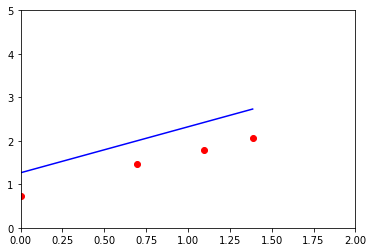

In [22]:
x=np.linspace(logX2[0],logX2[-1],n2)
y=(a0 +a1*x)

print 
print 'grafica de los puntos con ajuste: '
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(logX2,logY2,'ro')
ax.plot(x,y,'b-')
ax.set_xlim(xmin=0.0, xmax=2)
ax.set_ylim(ymin=0.0, ymax=5)

In [23]:
#chi2

chi2=0

for i in xrange(0,n2):
    chi2=((y[i]-Y2[i])**2)/Y2[i]
    
print 'chi^2 = ',chi2

# r2

b=a1
bprima=a1=((n2*suma_xiyi)-(suma_xi*suma_yi))/(n2*suma_yi2-(suma_yi*suma_yi))

r2=b*bprima
print 'r^2 = ',r2

chi^2 =  3.29463229059
r^2 =  1.11712606736
